# Import data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tickers = ['^YH31070020', '^YH31010010','^YH31080030','^YH31070030','^YH31050010']
Companies = ['Specialty Industrial Machinery','Aerospace & Defense','Railroads','Metal Fabrication','Farm & Heavy Construction Machinery']
dic_Companies = {tickers[i]: Companies[i] for i in range(len(tickers))}
data = yf.download(tickers, start='2022-02-01', end="2022-03-10", auto_adjust=True)['Close']
for i in tickers:
    data=data.rename(columns={i:dic_Companies[i]})
returns = (np.log(data / data.shift(1)))*100


[*********************100%***********************]  5 of 5 completed


Text(2022-02-24 00:00:00, -5, '2022/02/24\nRussia-Ukraine war')

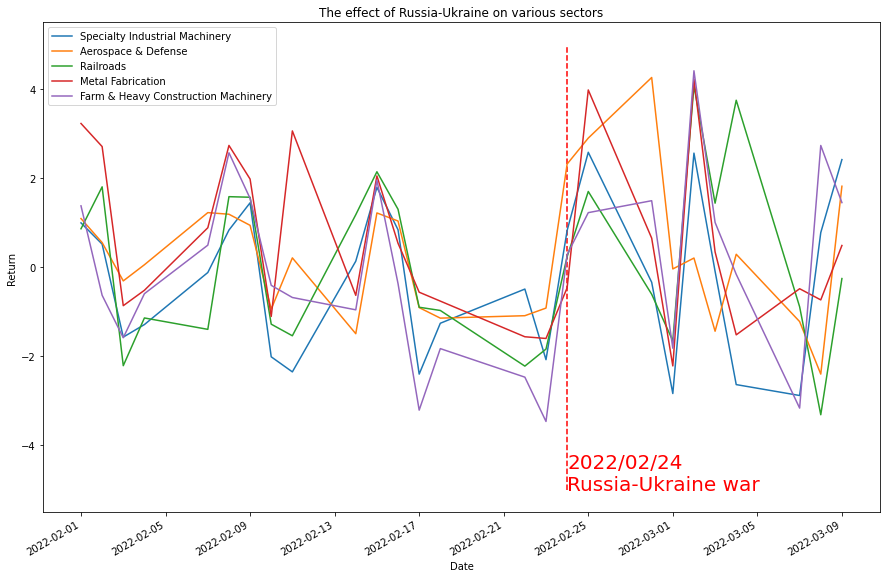

In [3]:
max_price=5
min_price=-5

event_data_U=[datetime(2022, 2, 24)]
event_U='2022/02/24\nRussia-Ukraine war'

Plot_Price=returns[Companies].plot(figsize=(15,10))
plt.title('The effect of Russia-Ukraine on various sectors')
plt.xlabel('Date')
plt.ylabel('Return')

plt.vlines(x=event_data_U, ymin=min_price, ymax=max_price, color='r', linestyle = '--', label=event_U)
plt.text(datetime(2022, 2, 24), min_price, event_U, {'color': 'red', 'fontsize': 20})


#plt.show()

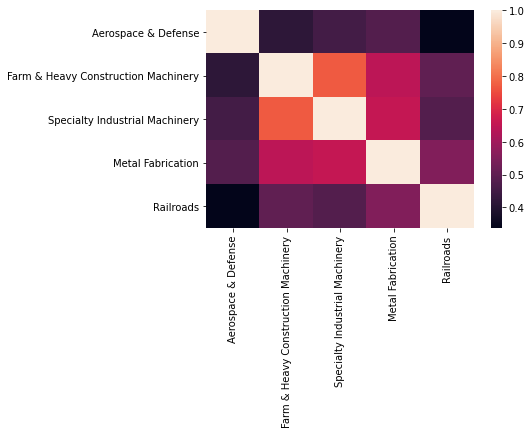

In [4]:
#correlation_matrix = returns.corr()
#print(str(round(correlation_matrix,3)))
sns.heatmap(returns.corr());